In [97]:
#importing libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read CSV File
df=pd.read_csv('customer_booking.csv')
customer_booking=df
customer_booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [98]:
#printing information about the dataset
customer_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [99]:
#statistical summary of the dataset
customer_booking.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,1.59,84.94,23.04,9.07,0.67,0.30,0.43,7.28,0.15
std,1.02,90.45,33.89,5.41,0.47,0.46,0.49,1.50,0.36
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,4.67,0.00
25%,1.00,21.00,5.00,5.00,0.00,0.00,0.00,5.62,0.00
50%,1.00,51.00,17.00,9.00,1.00,0.00,0.00,7.57,0.00
75%,2.00,115.00,28.00,13.00,1.00,1.00,1.00,8.83,0.00
max,9.00,867.00,778.00,23.00,1.00,1.00,1.00,9.50,1.00


In [100]:
#Finding columns with Categorical Values
customer_booking.select_dtypes(exclude=['int','float']).columns.tolist()

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [101]:
#Finding columns with Numerical Values
customer_booking.select_dtypes(include=['int','float']).columns.tolist()

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

In [102]:
#shape of the dataset
print(customer_booking.shape)

(50000, 14)


In [103]:
#data types
print(customer_booking.dtypes)

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object


# missing value analysis

In [104]:
customer_booking.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

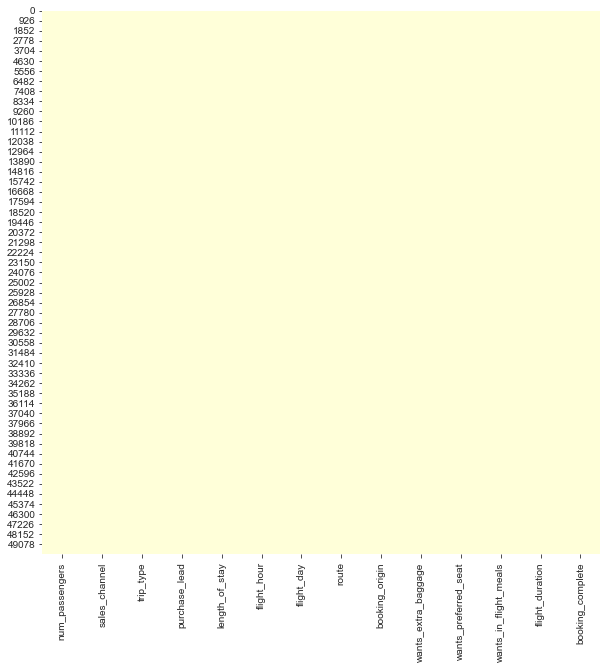

In [105]:
#Missing value heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(customer_booking.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [106]:
#customer_booking.style.background_gradient(cmap='plasma')

# Target class exploration

In [107]:
#booking_complete is the column that am going to predict with the help of other columns. 
#explore the different possible values in that column
#Prints unique values in booking_complete column

customer_booking.booking_complete.unique()

array([0, 1], dtype=int64)

In [108]:
#Convert column names to a list
l=list(customer_booking.columns)
print(l)

['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']


# dataset is imbalanced 

In [109]:
#Estimating the data-points for each class of the booking_complete column 
customer_booking['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

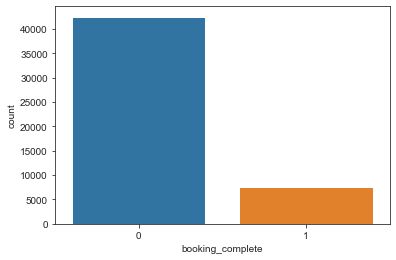

In [110]:
#Explore Target class
#The next step is to visualize the information to analyze the data. 
#Data visualization is the graphical representation that contains the information and the data. 
#Visualization of data helps to understand the data better.
#Showing the total count of complete booking(1) and not completed booking(0) in a counterplot

sns.countplot(customer_booking['booking_complete']);

# Balancing dataset 

In [111]:
from sklearn.utils import resample
# Separate majority and minority classes
customer_booking_majority = customer_booking[customer_booking.booking_complete==0]
customer_booking_minority = customer_booking[customer_booking.booking_complete==1]
 
# Upsample minority class
customer_booking_minority_upsampled = resample(customer_booking_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=42522,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
customer_booking_upsampled = pd.concat([customer_booking_majority, customer_booking_minority_upsampled])
 
# Display new class counts
customer_booking_upsampled.booking_complete.value_counts()

0    42522
1    42522
Name: booking_complete, dtype: int64

<AxesSubplot:xlabel='booking_complete', ylabel='count'>

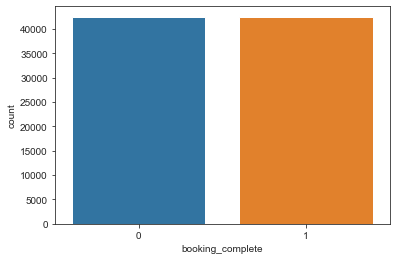

In [112]:
#plot of balanced dataset
plt.figure()
sns.countplot(customer_booking_upsampled['booking_complete'])

In [113]:
#printing information about the balanced dataset
customer_booking_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85044 entries, 0 to 33335
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         85044 non-null  int64  
 1   sales_channel          85044 non-null  object 
 2   trip_type              85044 non-null  object 
 3   purchase_lead          85044 non-null  int64  
 4   length_of_stay         85044 non-null  int64  
 5   flight_hour            85044 non-null  int64  
 6   flight_day             85044 non-null  object 
 7   route                  85044 non-null  object 
 8   booking_origin         85044 non-null  object 
 9   wants_extra_baggage    85044 non-null  int64  
 10  wants_preferred_seat   85044 non-null  int64  
 11  wants_in_flight_meals  85044 non-null  int64  
 12  flight_duration        85044 non-null  float64
 13  booking_complete       85044 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 11.7+

# context of features 
num_passengers = number of passengers travelling

sales_channel = sales channel booking was made on

trip_type = trip Type (Round Trip, One Way, Circle Trip)

purchase_lead = number of days between travel date and booking date

length_of_stay = number of days spent at destination

flight_hour = hour of flight departure

flight_day = day of week of flight departure

route = origin -> destination flight route

booking_origin = country from where booking was made

wants_extra_baggage = if the customer wanted extra baggage in the booking

wants_preferred_seat = if the customer wanted a preferred seat in the booking

wants_in_flight_meals = if the customer wanted in-flight meals in the booking

flight_duration = total duration of flight (in hours)

booking_complete = flag indicating if the customer completed the booking

# Feature Exploration 

In [114]:
customer_booking_upsampled.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [115]:
customer_booking_upsampled.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [116]:
customer_booking_upsampled.purchase_lead.unique()

array([262, 112, 243,  96,  68,   3, 201, 238,  80, 378, 185,   8, 265,
       245, 192, 259,  19,  67, 351, 228,  21,  23,  25,  16,  66,  51,
        37, 101,   7,   5,  33,  20,  56,  13,  71, 346,   9,  65, 221,
       107,  14,  77,  24,  47,  22,  11,  35, 272, 250, 161, 128, 190,
       311,  27, 314, 102,   2,  26,  32,  57, 198, 120,  69, 281, 282,
        31, 316, 232, 196, 283,  34,  63,   6, 227, 138, 134,  85,  93,
       118,  90, 168,  18, 153, 186, 263, 172, 230,  81, 140,  42, 285,
       179, 341, 173, 180, 366, 174,  82,  75, 163, 105, 276, 110,  83,
       154,  55,  45,  54, 193, 166,  97, 239, 182,  53,  28, 384,  70,
       126,  87,  86, 313,  41,  91, 206, 197, 268, 157, 145, 241,  99,
       139, 396, 280,  79, 380, 229, 132, 121, 419,  58, 115, 236, 116,
       191, 275, 417, 159,  92, 106, 218, 295,  12, 305, 332, 125, 204,
       310, 368,  59, 169, 214, 155, 325, 130, 189, 226, 122,  88, 129,
       149,  38, 194, 183,  40, 135,  15, 162, 150,  73, 133,  8

In [117]:
customer_booking_upsampled.length_of_stay.unique()

array([ 19,  20,  22,  31,  48,  33,  30,  25,  43,  24,  17,  34,  18,
        37,  29, 155,  88,  27,  21,  28,  47,  35,  82,  26,  90,  23,
        84,  61,  40,  96,  69,  89,  58,  56, 110, 165, 111,  38, 207,
        91,   1, 274,  44,  57, 106,  68,  51, 196,  77,  41,  87, 278,
       108,  72,  32,  62,  45,  50,  59, 125,  46,  55,  60, 180,  36,
        65, 208, 204,  83,  85,  64,  86,  54, 238,  42,  39,  95,  70,
        93,  49, 107, 121, 188,  78, 209, 126,  80, 200,  63,  92, 118,
        76,  94, 305, 149, 177, 162,  71, 109,  79,  52, 140,  66, 184,
       152,  53, 291, 329,  75, 130, 142, 175,  73, 304, 186, 116, 101,
       223, 312, 143,  81, 144, 135, 181, 117, 120, 138, 153,  74, 261,
       103, 104, 112, 157, 266,  98, 318, 273, 105, 148, 102, 119, 603,
       409, 128,  67,  99, 113, 147, 127,  97, 170, 156, 160, 182, 115,
       158,   0, 357, 173, 228, 124, 205, 123, 178, 141, 139, 129, 301,
       176, 332, 217, 122, 358, 285, 163, 348, 392, 179, 132, 43

In [118]:
customer_booking_upsampled.flight_hour.unique()

array([ 7,  3, 17,  4, 15, 20,  6, 14, 12,  2, 19, 10,  8, 23,  9, 13, 11,
        0,  1,  5, 16, 18, 22, 21], dtype=int64)

In [119]:
customer_booking_upsampled.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [120]:
customer_booking_upsampled.route.unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPVG', 'AKLTPE', 'AORICN', 'AORKIX',
       'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER', 'BBISYD',
       'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA', 'BDOKIX',
       'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS', 'BDOPVG',
       'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS', 'BKICTU',
       'BKIHND', 'BKIICN', 'BKIKIX', 'BKIMEL', 'BKIMRU', 'BKIOOL',
       'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG', 'BKISYD', 'BKIXIY',
       'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD', 'BOMMEL', 'BOMOOL',
       'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN', 'BTUPER', 'BTUSYD',
       'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH', 'BWNIKA', 'BWNKTM',
       'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD', 'BWNTPE', 'CANDEL',
       'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL', 'CANPER', 'CANSYD',
       'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER', 'CCUSYD', 'CCUTPE',
       'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBSYD', 'CGKCKG', 'CGKC

In [121]:
customer_booking_upsampled.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Switzerland', 'Germany', 'Indonesia',
       'Czech Republic', 'Vietnam', 'Thailand', 'Spain', 'Romania',
       'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates', 'Tonga',
       'Réunion', 'Netherlands', 'Hong Kong', 'Philippines', 'Sri Lanka',
       'Croatia', 'Singapore', 'United States', 'France', 'Laos',
       'Hungary', 'Portugal', 'Cyprus', 'Saudi Arabia', 'Cambodia',
       'Poland', 'Belgium', 'Oman', 'Australia', '(not set)',
       'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan', 'Brunei',
       'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Qatar', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Russia', 'Kuwait', 'Mexico', 'Nepal', 'Austria', 'Lebanon',
       'Jordan', 'Greece', 'Mongolia', 'Bangladesh', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (Burma)', '

In [122]:
customer_booking_upsampled.wants_extra_baggage.unique()

array([1, 0], dtype=int64)

In [123]:
customer_booking_upsampled.wants_preferred_seat.unique()

array([0, 1], dtype=int64)

In [124]:
customer_booking_upsampled.wants_in_flight_meals.unique()

array([0, 1], dtype=int64)

In [125]:
customer_booking_upsampled.flight_duration.unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 5.33, 4.67, 5.62,
       8.58, 8.67, 4.72, 8.15, 6.42, 6.33, 5.  , 4.83, 9.5 , 5.13])

# Convert data type

In [126]:
#change data format for trip type

mapping = {
    "RoundTrip": 2,
    "CircleTrip": 3,
    "OneWay":1,
}

customer_booking_upsampled["trip_type"] = customer_booking_upsampled["trip_type"].map(mapping)

In [127]:
customer_booking_upsampled.trip_type.unique()

array([2, 3, 1], dtype=int64)

In [128]:
#change data format for flight_day

mapping = {
    "Mon":1,
    "Tue":2,
    "Wed":3,
    "Thu":4,
    "Fri":5,
    "Sat":6,
    "Sun":7,
}

customer_booking_upsampled["flight_day"] = customer_booking_upsampled["flight_day"].map(mapping)

In [129]:
customer_booking_upsampled.flight_day.unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [130]:
#change data format for sales channel

mapping = {
    "Internet": 1,
    "Mobile": 0,
}

customer_booking_upsampled["sales_channel"] = customer_booking_upsampled["sales_channel"].map(mapping)

In [131]:
customer_booking_upsampled.sales_channel.unique()

array([1, 0], dtype=int64)

# Quantitative, Statistical, Evaluation of Variables

<AxesSubplot:>

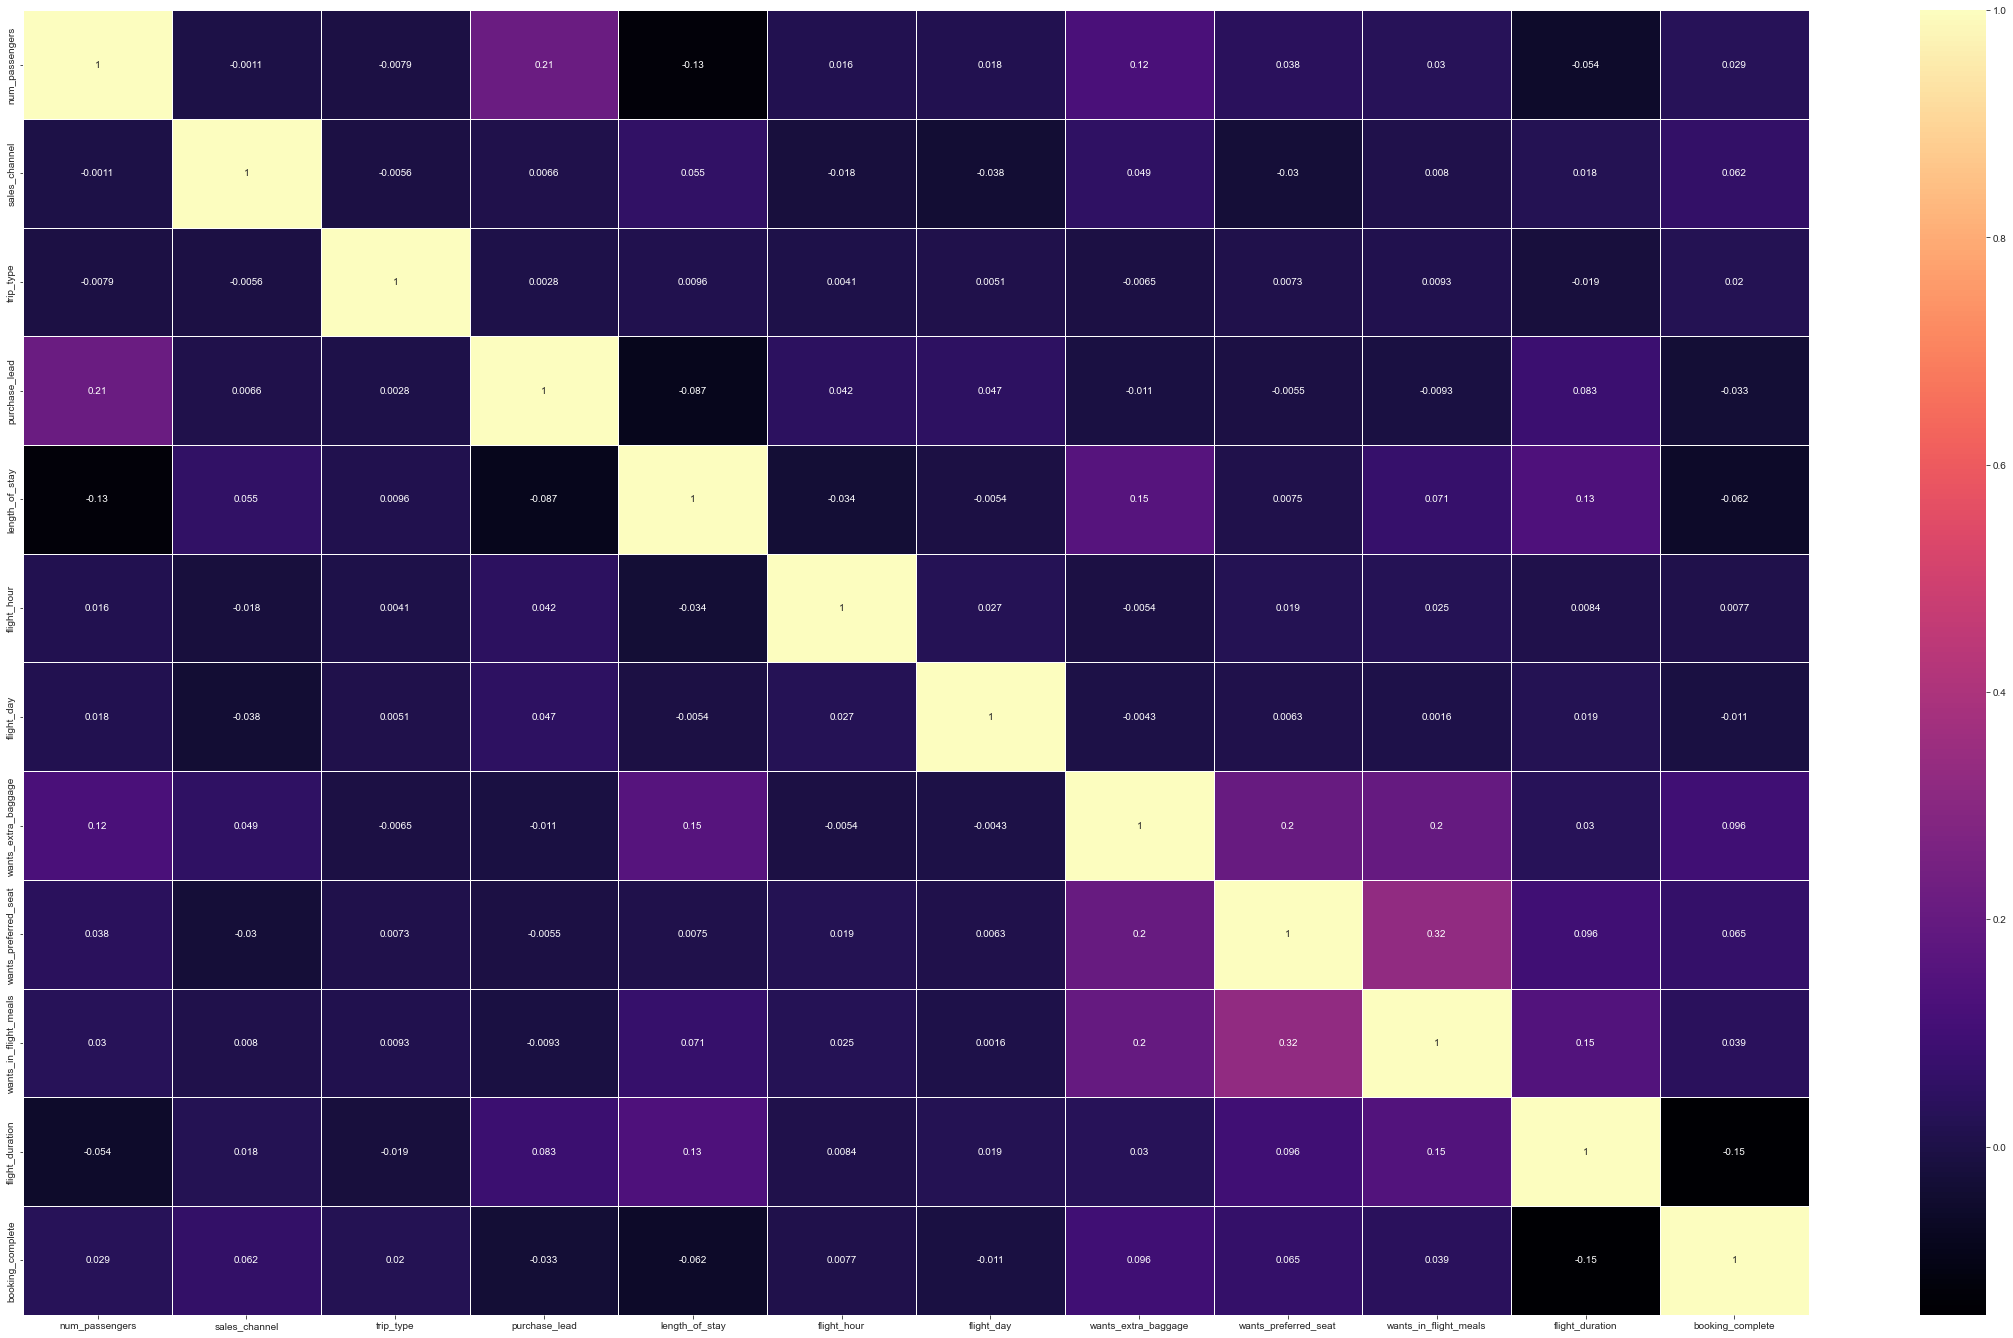

In [132]:
#correlation heatmap shwoing the relationship between variables
plt.figure (figsize= (40,24))
sns.heatmap(customer_booking_upsampled.corr(),annot=True,cmap='magma',linewidths=1)

<Figure size 1080x720 with 0 Axes>

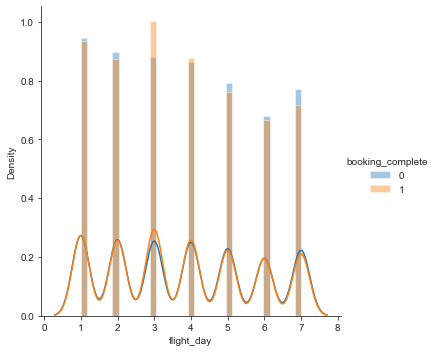

In [133]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "flight_day") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

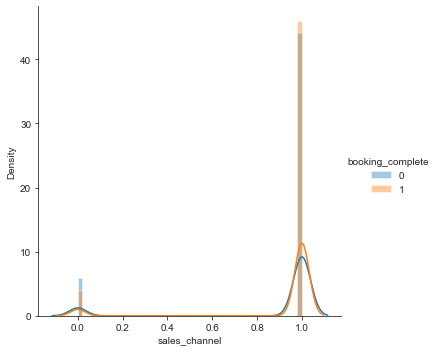

In [134]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "sales_channel") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

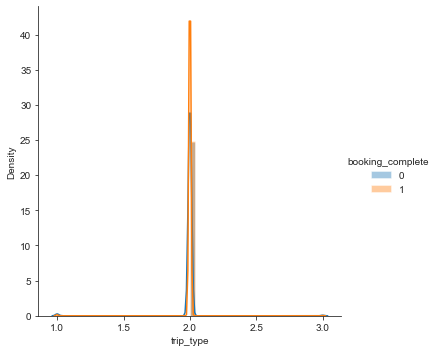

In [135]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "trip_type") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

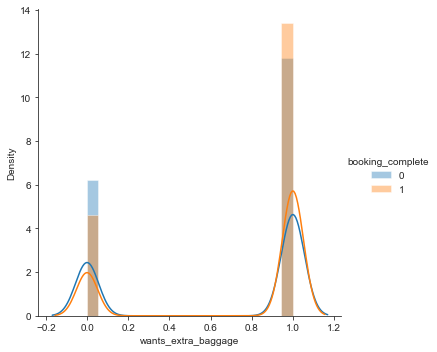

In [136]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "wants_extra_baggage") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

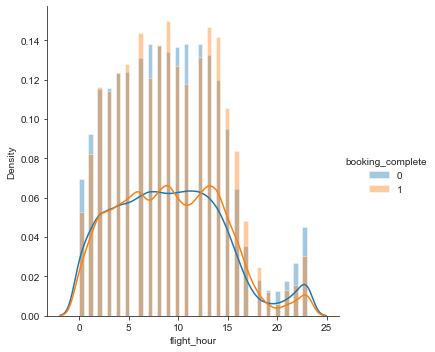

In [137]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "flight_hour") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

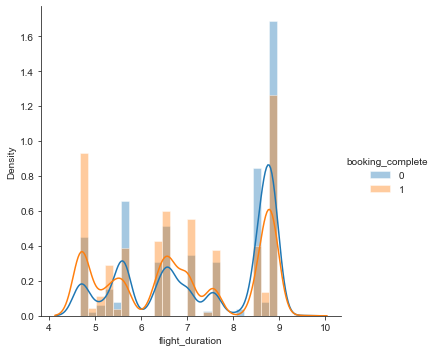

In [138]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "flight_duration") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

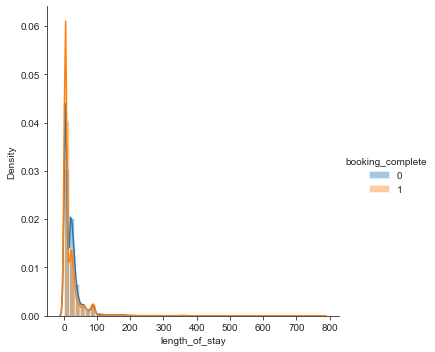

In [139]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "length_of_stay") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

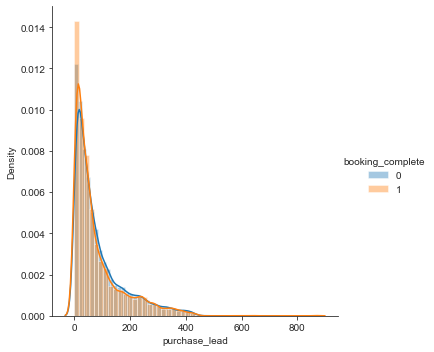

In [140]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "purchase_lead") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

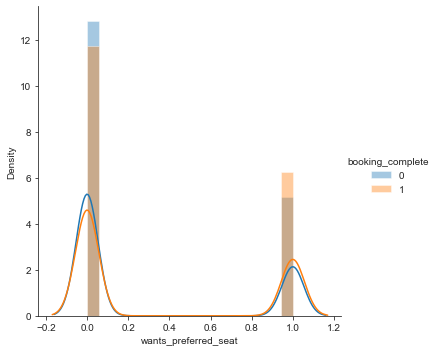

In [141]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "wants_preferred_seat") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

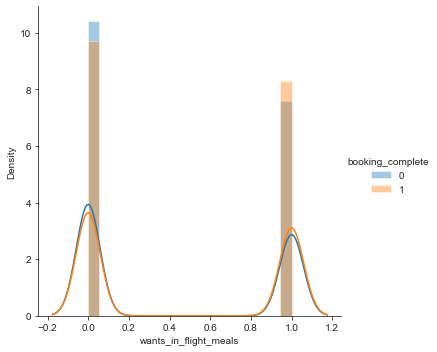

In [142]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "wants_in_flight_meals") \
   .add_legend();
plt.show();

<Figure size 1080x720 with 0 Axes>

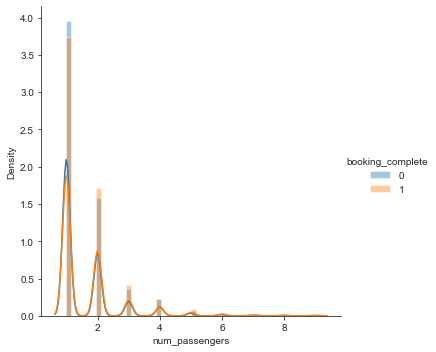

In [143]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(customer_booking_upsampled, hue="booking_complete", height=5) \
   .map(sns.distplot, "num_passengers") \
   .add_legend();
plt.show();

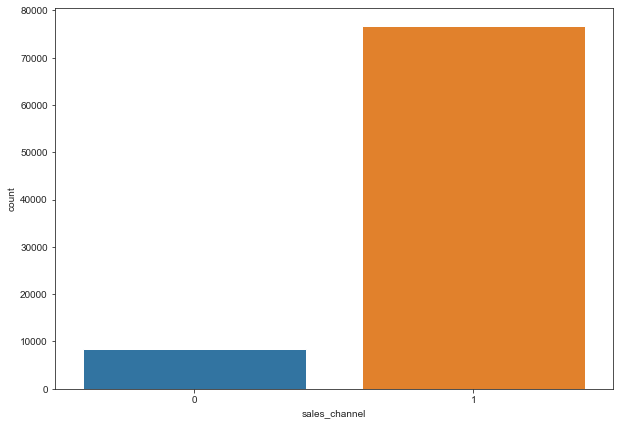

In [144]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (10, 7))
sns.countplot(customer_booking_upsampled['sales_channel']);
plt.show()

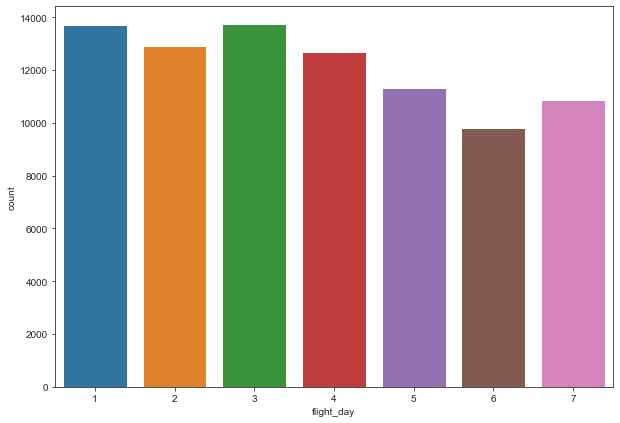

In [145]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (10, 7))
sns.countplot(customer_booking_upsampled['flight_day']);
plt.show()

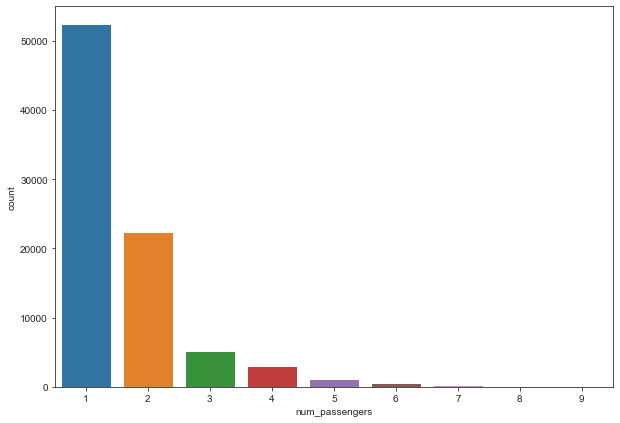

In [146]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (10, 7))
sns.countplot(customer_booking_upsampled['num_passengers']);
plt.show()

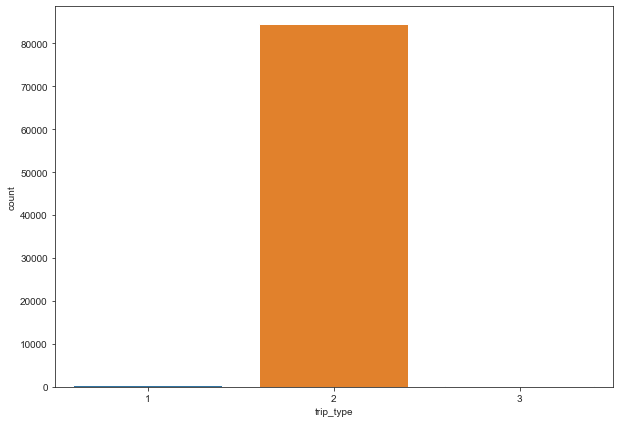

In [147]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (10, 7))
sns.countplot(customer_booking_upsampled['trip_type']);
plt.show()

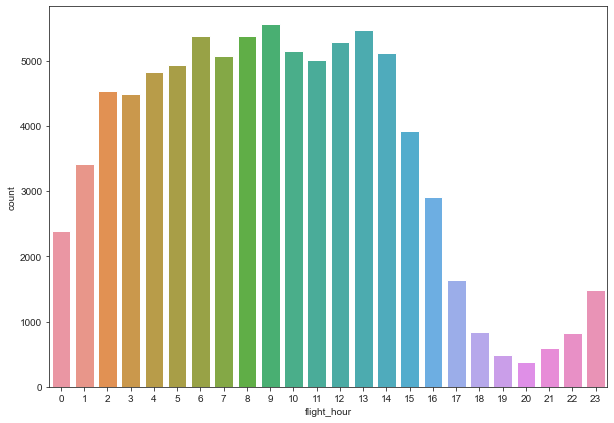

In [148]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (10, 7))
sns.countplot(customer_booking_upsampled['flight_hour']);
plt.show()

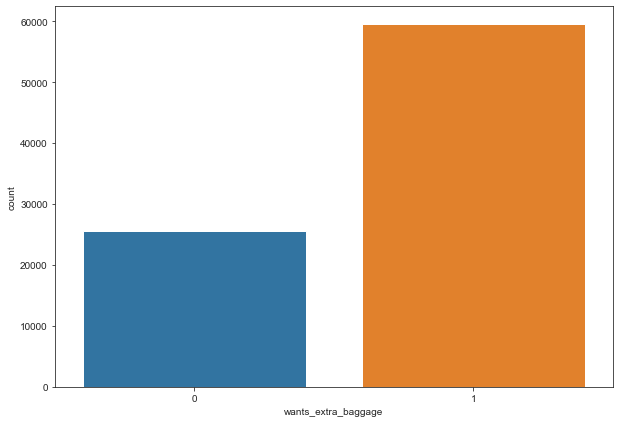

In [149]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (10, 7))
sns.countplot(customer_booking_upsampled['wants_extra_baggage']);
plt.show()

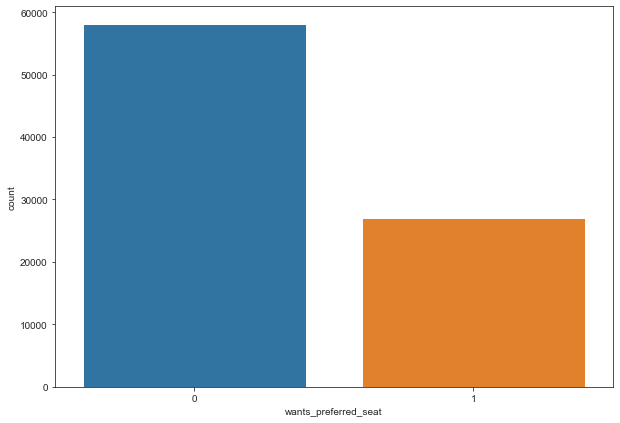

In [150]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (10, 7))
sns.countplot(customer_booking_upsampled['wants_preferred_seat']);
plt.show()

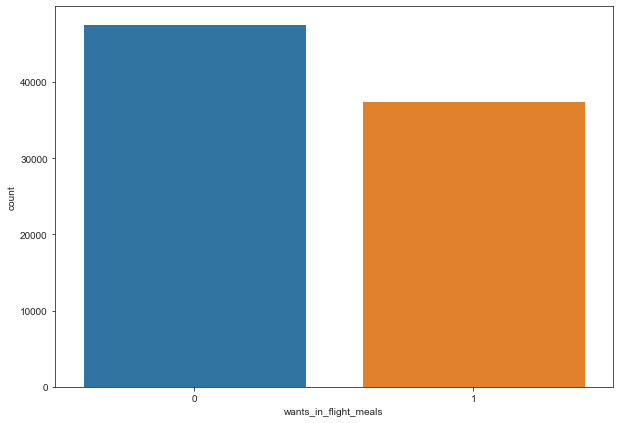

In [151]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (10, 7))
sns.countplot(customer_booking_upsampled['wants_in_flight_meals']);
plt.show()

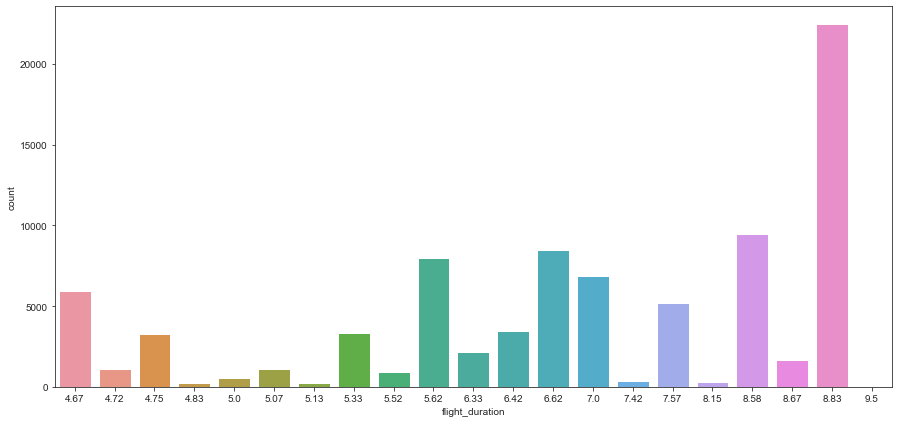

In [152]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (15, 7))
sns.countplot(customer_booking_upsampled['flight_duration']);
plt.show()

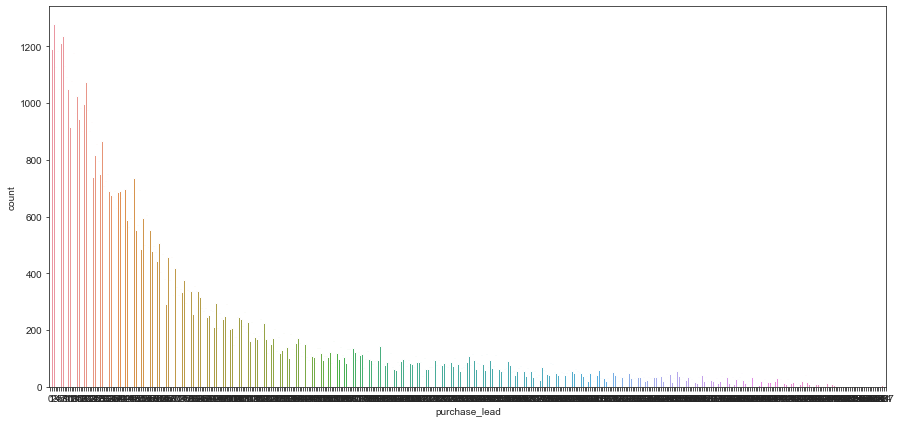

In [153]:
#countplot 
sns.set_style('ticks')
plt.figure(figsize = (15, 7))
sns.countplot(customer_booking_upsampled['purchase_lead']);
plt.show()

<AxesSubplot:xlabel='num_passengers'>

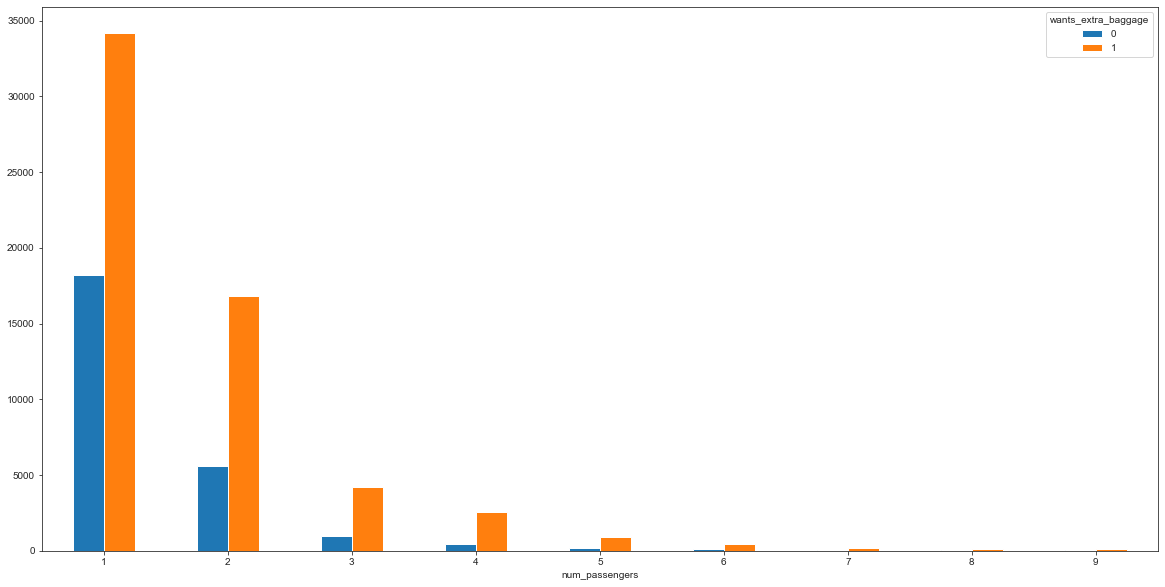

In [154]:
#Grouped bar chart 
CrosstabResult=pd.crosstab(index=customer_booking_upsampled['num_passengers'],columns=customer_booking_upsampled['wants_extra_baggage'])
#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

<AxesSubplot:xlabel='sales_channel'>

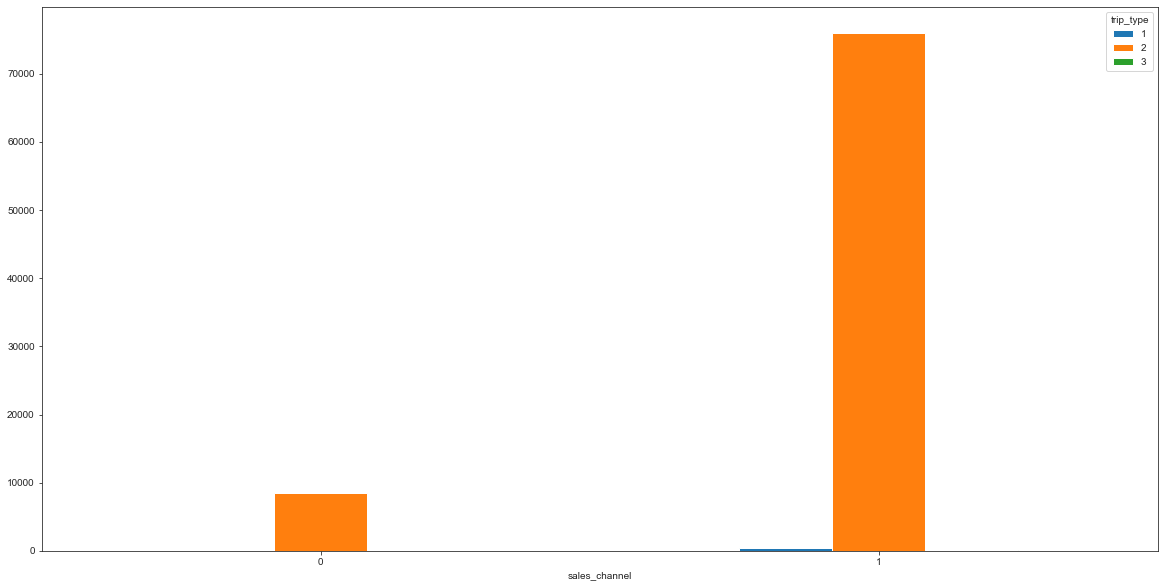

In [155]:
#Grouped bar chart 
CrosstabResult=pd.crosstab(index=customer_booking_upsampled['sales_channel'],columns=customer_booking_upsampled['trip_type'])
#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

<AxesSubplot:xlabel='flight_day'>

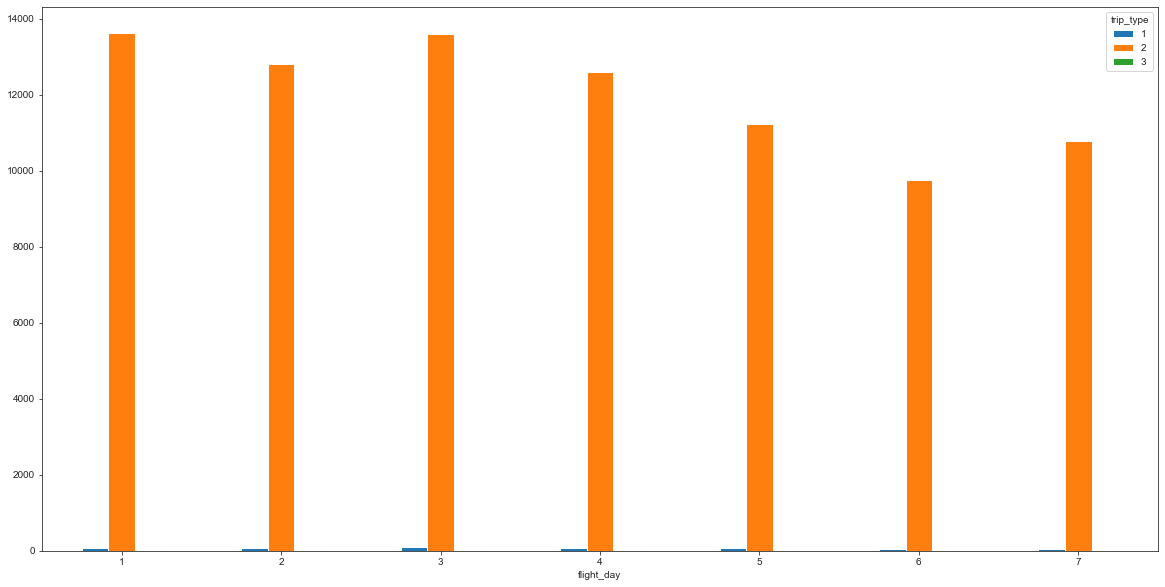

In [156]:
#Grouped bar chart 
CrosstabResult=pd.crosstab(index=customer_booking_upsampled['flight_day'],columns=customer_booking_upsampled['trip_type'])
#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

<AxesSubplot:xlabel='wants_extra_baggage'>

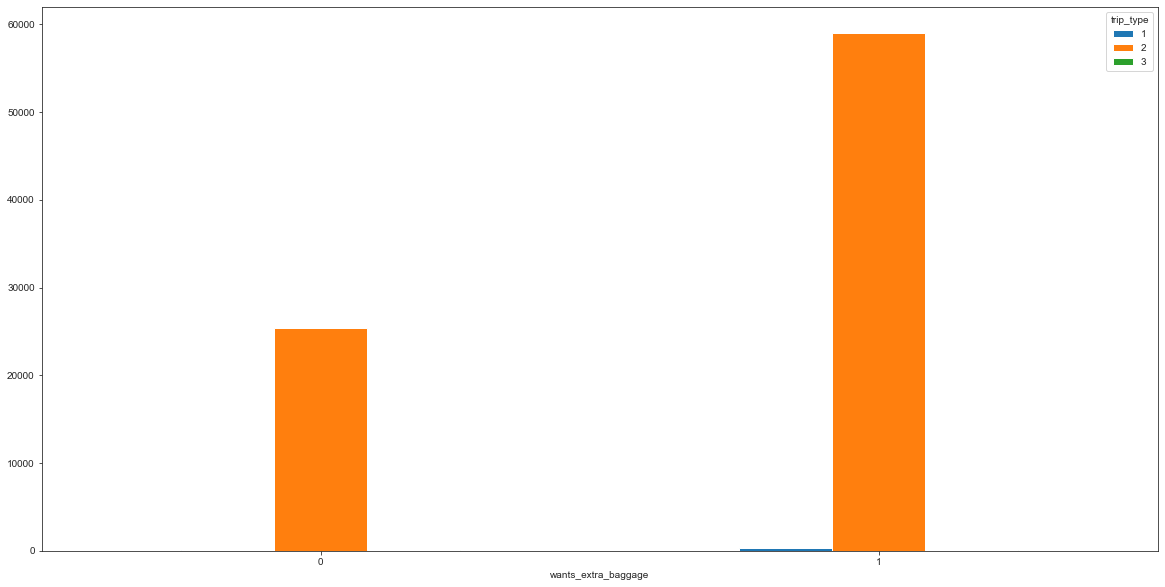

In [157]:
#Grouped bar chart 
CrosstabResult=pd.crosstab(index=customer_booking_upsampled['wants_extra_baggage'],columns=customer_booking_upsampled['trip_type'])
#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

<AxesSubplot:xlabel='wants_extra_baggage'>

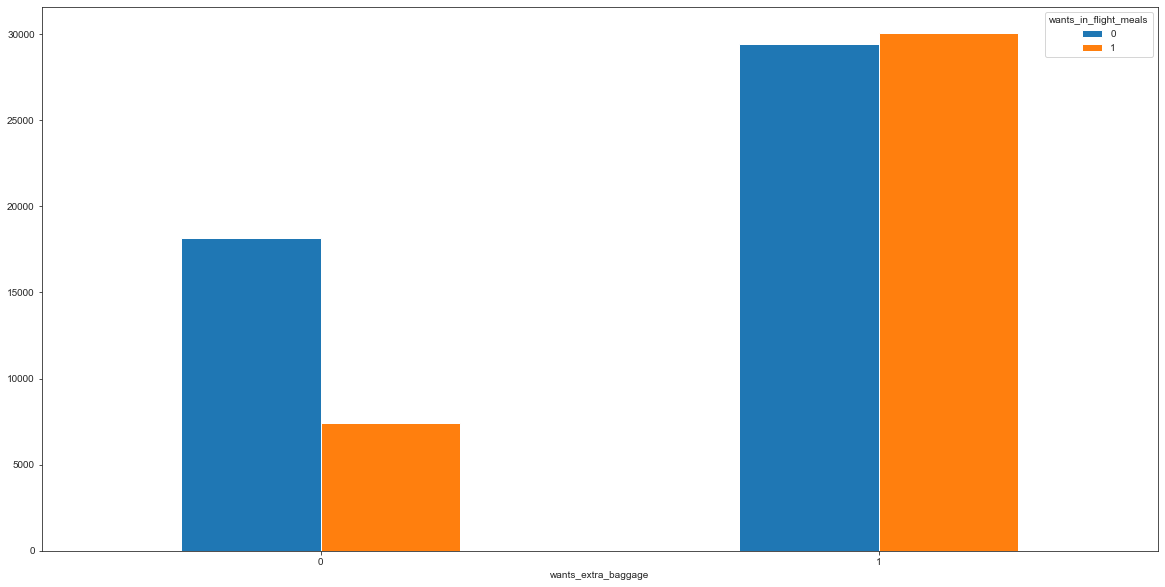

In [158]:
#Grouped bar chart 
CrosstabResult=pd.crosstab(index=customer_booking_upsampled['wants_extra_baggage'],columns=customer_booking_upsampled['wants_in_flight_meals'])
#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

In [159]:
customer_booking_upsampled.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

# Feature Selection using SelectKBest 

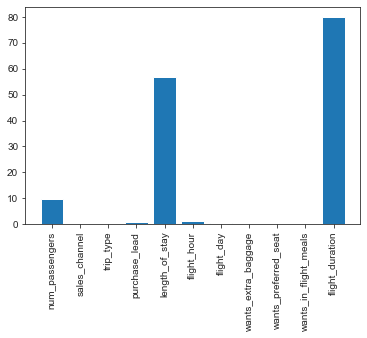

In [160]:
#importing libraries
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

#specifying targeted coloumns 
predictors = ["num_passengers", 
              "sales_channel", 
              "trip_type", 
              "purchase_lead", 
              "length_of_stay",
              "flight_hour", 
              "flight_day", 
              "wants_extra_baggage",
              "wants_preferred_seat",
              "wants_in_flight_meals", 
              "flight_duration"]

#drop negative values
usethis = customer_booking_upsampled.dropna()
usethis.reset_index(drop=True)

usethis = usethis.filter(["num_passengers", 
                          "sales_channel", 
                          "trip_type", 
                          "purchase_lead", 
                          "length_of_stay", 
                          "flight_hour", 
                          "flight_day", 
                          "wants_extra_baggage",
                          "wants_preferred_seat", 
                          "wants_in_flight_meals", 
                          "flight_duration", 
                           "booking_complete"], axis=1)

usethisnow = usethis[(usethis["num_passengers"]>0) 
                     & (usethis["sales_channel"]>0) 
                     & (usethis["trip_type"]>0)
                     & (usethis["purchase_lead"]>0) 
                     & (usethis["length_of_stay"]>0) 
                     & (usethis["flight_hour"]>0) 
                     & (usethis["flight_day"]>0) 
                     & (usethis["wants_extra_baggage"]>0) 
                     & (usethis["wants_preferred_seat"]>0) 
                     & (usethis["wants_in_flight_meals"]>0) 
                     & (usethis["flight_duration"]>0)]
usethisnow
#top N conditions are for target variable (i.e., diagnosis )
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(usethisnow[predictors], usethisnow["booking_complete"])

#get the p-values for each feature 
#and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

# Using plt to plot the scores!

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# pair plot is implemented in this case to understand the distribution of the dataset

array([[<AxesSubplot:xlabel='flight_duration', ylabel='flight_duration'>,
        <AxesSubplot:xlabel='length_of_stay', ylabel='flight_duration'>,
        <AxesSubplot:xlabel='num_passengers', ylabel='flight_duration'>,
        <AxesSubplot:xlabel='flight_hour', ylabel='flight_duration'>,
        <AxesSubplot:xlabel='purchase_lead', ylabel='flight_duration'>],
       [<AxesSubplot:xlabel='flight_duration', ylabel='length_of_stay'>,
        <AxesSubplot:xlabel='length_of_stay', ylabel='length_of_stay'>,
        <AxesSubplot:xlabel='num_passengers', ylabel='length_of_stay'>,
        <AxesSubplot:xlabel='flight_hour', ylabel='length_of_stay'>,
        <AxesSubplot:xlabel='purchase_lead', ylabel='length_of_stay'>],
       [<AxesSubplot:xlabel='flight_duration', ylabel='num_passengers'>,
        <AxesSubplot:xlabel='length_of_stay', ylabel='num_passengers'>,
        <AxesSubplot:xlabel='num_passengers', ylabel='num_passengers'>,
        <AxesSubplot:xlabel='flight_hour', ylabel='num_passeng

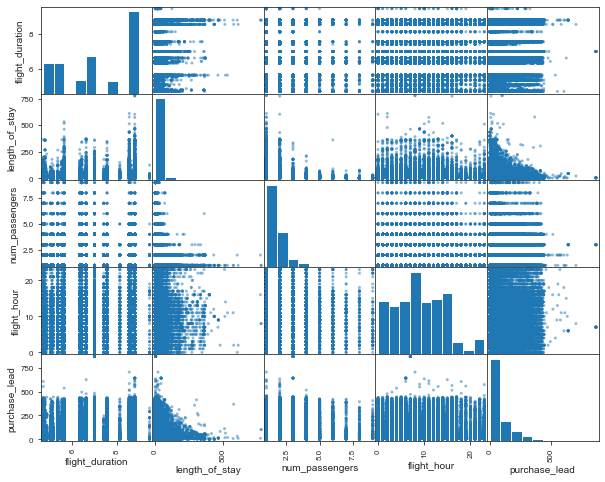

In [161]:
#The data suggest that there are no big anomalies within the data, 
#and most of the variables follow a linear relationship

import plotly.express as px
from IPython.display import display
from pandas.plotting import scatter_matrix

predictors = ["flight_duration", 
              "length_of_stay",
              "num_passengers",
              "flight_hour",
              "purchase_lead"]
scatter_matrix(customer_booking_upsampled[predictors], figsize = (10,8))

# Machine Learning Predictive Modelling

# Using lazypredict to check which machine learning model is best in predicting the customer buying behaviour 

In [162]:
#import lazypredict
#from sklearn.model_selection import train_test_split
#from lazypredict.Supervised import LazyClassifier


#X= usethisnow.drop(["booking_complete"], axis=1)
#y=usethisnow["booking_complete"]

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, 
                                                    #random_state=64)

#clf = LazyClassifier(verbose=0, 
                     #ignore_warnings=True, 
                     #custom_metric=None)

#models,predictions = clf.fit(X_train, X_test, 
                             #y_train, y_test)

#print(models)



In [163]:
# Importing libraries

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from matplotlib import pyplot
import numpy as np


#Selected features

#flight_duration
#length_of_stay
#num_passengers
#flight_hour
#purchase_lead

In [164]:
features= ["flight_duration",
           "length_of_stay",
           "num_passengers",
           "flight_hour",
           "purchase_lead"]
           
target = ['booking_complete']


#drop negative values
usethis = customer_booking_upsampled.dropna()
usethis.reset_index(drop=True)

usethis = usethis.filter(["flight_duration",
                          "length_of_stay",
                          "num_passengers",
                          "flight_hour",
                          "purchase_lead",
                         "booking_complete"],axis=1)

usethisnow = usethis[(usethis["flight_duration"]>0) 
                     & (usethis["length_of_stay"]>0) 
                     & (usethis["num_passengers"]>0)
                     & (usethis["flight_hour"]>0)
                     & (usethis["purchase_lead"]>0)]

from sklearn.model_selection import train_test_split
y_target = usethisnow["booking_complete"].values
Xfeatures = usethisnow.drop("booking_complete", axis=1)

#The new bit is to use test-train split like so: 80:20

X_train, X_test, y_train, y_test = train_test_split(Xfeatures,
                                                    y_target,
                                                    test_size=0.2,
                                                    random_state=1)   




# Feature Scaling

In [165]:
#Using StandardScaler method in Scikit-Learn Library for scaling our data.
#importing library
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train = ss.fit_transform (X_train)
X_test = ss.fit_transform (X_test)

# Random Forest Classifier

In [166]:

rfc = RandomForestClassifier(n_estimators=104, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=5, 
                             min_samples_leaf=3, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             bootstrap=True, 
                             oob_score=True, 
                             n_jobs=-1, 
                             random_state=1, 
                             verbose=0, 
                             warm_start=False, 
                             class_weight=None, 
                             ccp_alpha=0.0, 
                             max_samples=None)
#fitting Random forest classifier to the training set

rfc.fit (X_train,y_train)  

RandomForestClassifier(max_features='auto', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=104, n_jobs=-1,
                       oob_score=True, random_state=1)

In [167]:
#Predicting output with the test data
y_pred = rfc.predict (X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [168]:
#Calculating test accuracy
#testing the model
y_pred

#importing accuracy score
from sklearn.metrics import accuracy_score

#printing the accuracy of the model
print(round(accuracy_score(y_test, y_pred) * 100, 0))

86.0


In [169]:
#Training Time
%time history = rfc.fit(X_train, y_train)

Wall time: 6.28 s


<AxesSubplot:>

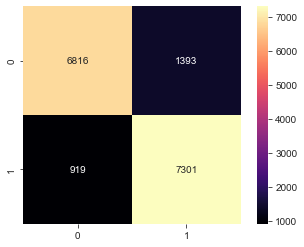

In [170]:
#Importing confusion matrics 
from sklearn.metrics import confusion_matrix
classifier=rfc
conf_mat = confusion_matrix(y_test,classifier.predict(X_test))
sns.heatmap(conf_mat, 
            square=True, 
            annot=True, 
            cmap='magma', 
            fmt='d', 
            cbar=True)

In [171]:
predictions = rfc.predict(X_test)

#Importing classifiation_report, confusion_matrix

from sklearn.metrics import classification_report,confusion_matrix

#printing confusion matrix from the y_test values and predictions

print(confusion_matrix(y_test,predictions))


[[6816 1393]
 [ 919 7301]]


In [172]:
#printing classification report from the y_test values and predictions

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8209
           1       0.84      0.89      0.86      8220

    accuracy                           0.86     16429
   macro avg       0.86      0.86      0.86     16429
weighted avg       0.86      0.86      0.86     16429



# Decision Tree Classifier

In [173]:

dtc = DecisionTreeClassifier(criterion='gini', 
                             splitter='best', 
                             max_depth=None, 
                             min_samples_split=5, 
                             min_samples_leaf=8, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=None, random_state=1, 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             class_weight=None, ccp_alpha=0.0)

#fitting decision tree classifier to the training set 

dtc.fit (X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=5, random_state=1)

In [174]:
#Predicting output with the test data
y_pred = dtc.predict (X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
#Calculating test accuracy
#testing the model
y_pred

#printing the accuracy of the model
print(round(accuracy_score(y_test, y_pred) * 100, 0))

73.0


In [176]:
#Training Time
%time history = dtc.fit(X_train, y_train)

Wall time: 280 ms


<AxesSubplot:>

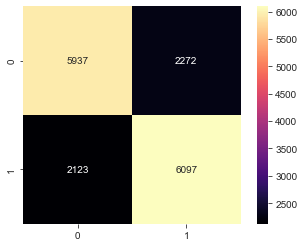

In [177]:
#Confusion matrics
#A confusion matrix is a technique for summarizing the performance of a classification algorithm.

classifier=dtc
conf_mat = confusion_matrix(y_test, classifier.predict(X_test))
sns.heatmap(conf_mat, 
            square=True, 
            annot=True, 
            cmap='magma', 
            fmt='d', 
            cbar=True)

In [178]:
predictions = dtc.predict(X_test)

#printing confusion matrix from the y_test values and predictions
print(confusion_matrix(y_test,predictions))

[[5937 2272]
 [2123 6097]]


In [179]:
#printing classification report from the y_test values and predictions
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      8209
           1       0.73      0.74      0.74      8220

    accuracy                           0.73     16429
   macro avg       0.73      0.73      0.73     16429
weighted avg       0.73      0.73      0.73     16429



# Comparing Classifier Algorithms using RepeatedStratifiedKFold and cross_val_score

In [180]:
#evaluate Random Forest classifier
rfc = RandomForestClassifier(n_estimators=104, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=5, 
                             min_samples_leaf=3, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             bootstrap=True, 
                             oob_score=True, 
                             n_jobs=-1, 
                             random_state=1, 
                             verbose=0, 
                             warm_start=False, 
                             class_weight=None, 
                             ccp_alpha=0.0, 
                             max_samples=None)

cv1= RepeatedStratifiedKFold(n_splits=10, 
                             n_repeats=3, 
                             random_state=1)

scores1 = cross_val_score(rfc, 
                          Xfeatures,
                          y_target, 
                          scoring='accuracy', 
                          cv=cv1, n_jobs=-1)
print(scores1)
print('Random Forest Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

[0.89920876 0.90346926 0.89640901 0.90127815 0.90273889 0.8963964
 0.89517896 0.90224008 0.9009009  0.8981008  0.89750456 0.90066951
 0.90200852 0.90188679 0.90322581 0.89627465 0.89603117 0.9017531
 0.89749209 0.89931824 0.90030432 0.89884358 0.90346926 0.90054778
 0.89920876 0.8963964  0.90029218 0.89310933 0.90272705 0.89749209]
Random Forest Mean Accuracy: 0.899 (0.003)


In [181]:
#evaluate decision tree classifier

dtc= DecisionTreeClassifier(criterion='gini', 
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=5, 
                            min_samples_leaf=8, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=1, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None, 
                            ccp_alpha=0.0)

cv2 = RepeatedStratifiedKFold(n_splits=10, 
                              n_repeats=3, 
                              random_state=1)

scores2 = cross_val_score(dtc, 
                          Xfeatures, 
                          y_target, 
                          scoring='accuracy', 
                          cv=cv1, 
                          n_jobs=-1)
print(scores2)
print('Decision tree Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

[0.7812538  0.76615946 0.77504565 0.76774194 0.76981132 0.7633309
 0.76503531 0.77514    0.76491356 0.77355734 0.76226415 0.76688984
 0.76762021 0.77029823 0.76993305 0.7697833  0.77404431 0.77136596
 0.77087899 0.76820063 0.76847231 0.76810712 0.77881923 0.77455873
 0.77528911 0.76454833 0.77684441 0.76369613 0.77355734 0.7678354 ]
Decision tree Mean Accuracy: 0.770 (0.005)


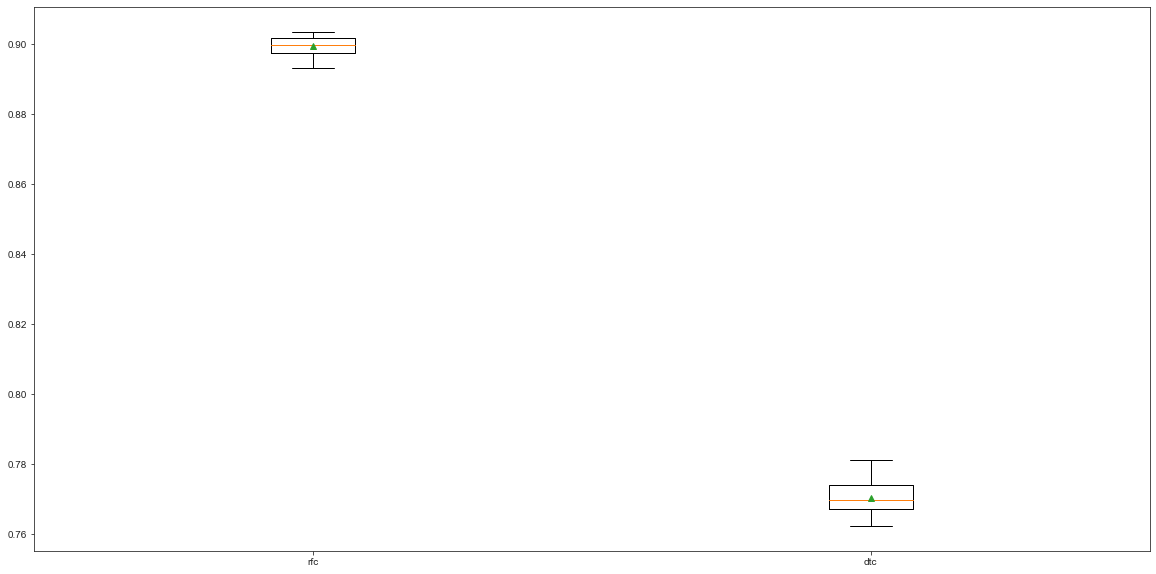

In [182]:
# box and whisker plot

# plot the results
#A box and whisker plot is also created summarizing the distribution of accuracy scores.
plt.figure (figsize= (20,10))

pyplot.boxplot([scores1,scores2],labels=['rfc','dtc'],showmeans=True)
pyplot.show()

# statistical hypothesis test

In [183]:
#use a hypothesis test to see if the observed results are statistically significant.
#use the 5×2 procedure to evaluate the algorithms and calculate a p-value and test statistic value
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms(Support vector machine and random forest classifier) is real
X=Xfeatures
y=y_target
t, p = paired_ttest_5x2cv(estimator1=rfc, estimator2=dtc, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.000, t-Statistic: 53.907


In [184]:
#interpret the p-value using an alpha of 5 percent.

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')
    
#In this case, we can see that the p-value is about 0.0, which is less than 0.05. This leads us to reject the null hypothesis, suggesting that any observed difference between the algorithms is probably not real.

#We could just as easily choose  Random forest classifier 

Difference between mean performance is probably real


In [185]:
import gzip
import pickle

# Open a gzip file for writing

with gzip.open('model.pkl.gz', 'wb') as f:
    # Write the pickle file to the gzip file
    pickle.dump(rfc, f)




In [186]:
# Open the gzip file for reading
with gzip.open('model.pkl.gz', 'rb') as f:
    # Load the pickle file from the gzip file
    rfc = pickle.load(f)


In [187]:
usethisnow.head()

,flight_duration,length_of_stay,num_passengers,flight_hour,purchase_lead,booking_complete
0,5.52,19,2,7,262,0
1,5.52,20,1,3,112,0
2,5.52,22,2,17,243,0
3,5.52,31,1,4,96,0
4,5.52,22,2,15,68,0


In [188]:
usethisnow.iloc[42157]

flight_duration      8.83
length_of_stay     202.00
num_passengers       1.00
flight_hour         17.00
purchase_lead        8.00
booking_complete     1.00
Name: 21073, dtype: float64

In [189]:
#prediction
rfc.predict([[8.83,
                202.00,
                1.00,
                17.00,
                8.00]])

array([1], dtype=int64)

In [190]:
#prediction
rfc.predict([[5.52,
                19.0,
                2.00,
                7.00,
                262.00]])

array([0], dtype=int64)

In [191]:
#prediction
rfc.predict([[8.83,
                202.0,
                3.00,
                17.00,
                8.00]])

array([0], dtype=int64)